# Semester Final Project

***🎯 Goal:*** Ask a question and answer it with a statistical investigation of your choosing.

Please make sure that you review [the rubric](https://docs.google.com/document/d/1PXHbL4Nvk_SqhOTZBWf4ZHdwnrugab7S6n3LZnxmxr0/edit?usp=sharing) before starting the project. When you are ready, fill out the sections below.

__________________________

## 🔎 My Question

*Did Spotify songs made in 2020 have better popularity scores than Spotify songs made in 2023?* <br>

*The null hypothesis would be that 2020 had a better average popularity score than 20223, and the other hypothesis would be that 2023 had a better average popularity score than 2020*

## 📖 My Study 

- *I will be using a retrospective observational study*
- *My population in my study is 1000 random Spotify songs from the years 2020 and 2023; each year will have 500*
- *The variables I will be focusing on will be the year the songs came out, and the popularity score of said songs*
- *I will use my Spotify API key to collect actual Spotify songs*
    - *I will use random sampling*
    - *I will make sure that you can't repeat the same songs*
- *My main source of bias would be undercoverage bias. There were a lot of songs made in these years, so for me to only pull 500 from each year wouldn't represent the full amount of songs that year*

## 🗂️ My Data

*Collect your data using the cell below. When you are done with your collection, read the data into a dataframe and call `info()` on your dataframe.*

In [14]:
import pandas as pd
import seaborn as sns
import requests
import json
import random
import asyncio
import os

In [15]:
SPOTIFY_CLIENT_ID = "620ac0623d894c0487fba11adf8a49f2"
SPOTIFY_CLIENT_SECRET = "dd9868320c4e45f19444d5386423383d"

auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

In [39]:
query = f"{search_query} year:2023"

spotify_response = requests.get(
    'https://api.spotify.com/v1/search',
    headers=headers,
    params={'q': query, 'type': 'track', 'limit': 50}
)

len(spotify_response.json()['tracks'])

7

## 📊 My Analysis

*Perform your analysis in the cell below. Please feel free to add more cells if you need them!*

In [43]:
# Search for a random popular track
year2023 = {
    'release_date' : [],
    'popularity' : [],
}


count = 0


while count < 500:
    search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
    query = f"{search_query} year:2023"
    spotify_response = requests.get(
        'https://api.spotify.com/v1/search',
        headers=headers,
        params={'q': query, 'type': 'track', 'limit': 50}
    )
    
    spotify_data = spotify_response.json()
    spotify_data

    
    if spotify_data['tracks']['items'][0]['album']['release_date'].split('-')[0] == '2023':
        year2023["popularity"].append(spotify_data['tracks']['items'][0]['popularity'])
        year2023["release_date"].append(spotify_data['tracks']['items'][0]['album']['release_date'])
        count = count + 1

In [50]:
# Search for a random popular track
year2020 = {
    'release_date' : [],
    'popularity' : [],
}


count = 0


while count < 500:
    search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
    query = f"{search_query} year:2020"
    spotify_response = requests.get(
        'https://api.spotify.com/v1/search',
        headers=headers,
        params={'q': query, 'type': 'track', 'limit': 50}
    )
    
    spotify_data = spotify_response.json()
    spotify_data

    
    if spotify_data['tracks']['items'][0]['album']['release_date'].split('-')[0] == '2020':
        year2020["popularity"].append(spotify_data['tracks']['items'][0]['popularity'])
        year2020["release_date"].append(spotify_data['tracks']['items'][0]['album']['release_date'])
        count = count + 1

# Histogram Comparison of Data

Histogram of popularity scores from year 2023

<Axes: xlabel='popularity', ylabel='Count'>

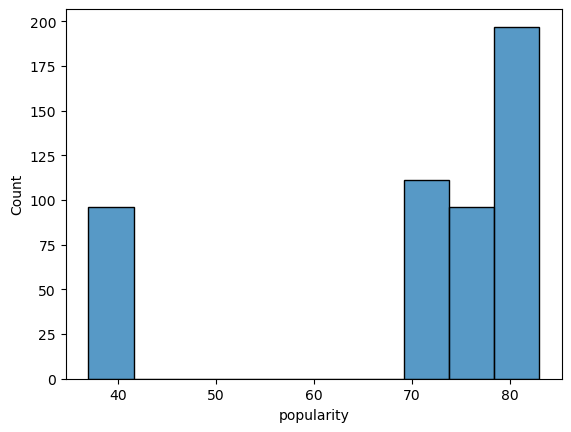

In [53]:
sns.histplot(data=year2023, x='popularity', bins=10)

Histogram of popularity scores from year 2020

<Axes: xlabel='popularity', ylabel='Count'>

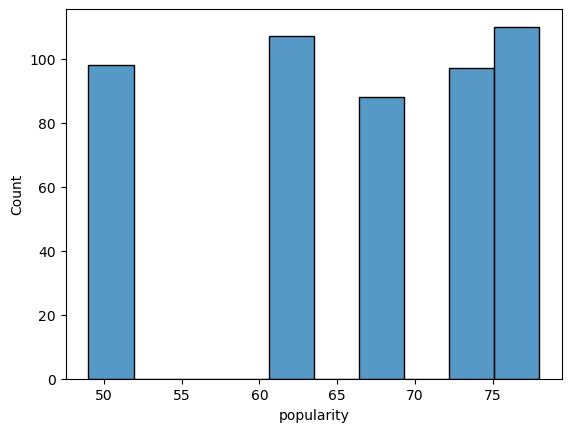

In [54]:
sns.histplot(data=year2020, x='popularity', bins=10)

Comparison

<Axes: xlabel='popularity', ylabel='Count'>

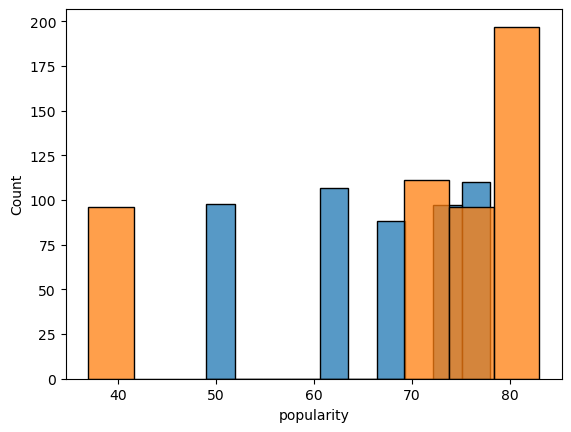

In [55]:
sns.histplot(data=year2020, x='popularity', bins=10)
sns.histplot(data=year2023, x='popularity', bins=10)

# Math Comparison ( Mean and Standard Deviation)

Year 2023

In [60]:
import statistics
import math
mean1 = statistics.mean(year2023["popularity"])
print("Mean :", mean1)
SD1 = statistics.stdev(year2023["popularity"])
print("Standard Deviation", SD1)
cv1 = 1.282
SE1 = SD1/math.sqrt(1000)
print("Standard Error", SE1)
ME1 = cv1 * SE1
print("Method Error", ME1)
CIupper1 = mean1 + ME1
print("Upper Confidence Interval", CIupper1)
CIlower1 = mean1 - ME1
print("Lower Confidence Interval", CIlower1)

Mean : 70.028
Standard Deviation 16.488752953085804
Standard Error 0.5214201510757863
Method Error 0.6684606336791581
Upper Confidence Interval 70.69646063367917
Lower Confidence Interval 69.35953936632085


Year 2020

In [61]:
import statistics
import math
mean = statistics.mean(year2020["popularity"])
print("Mean :", mean)
SD = statistics.stdev(year2020["popularity"])
print("Standard Deviation", SD)
cv = 1.282
SE = SD/math.sqrt(1000)
print("Standard Error", SE)
ME = cv * SE
print("Method Error", ME)
CIupper = mean + ME
print("Upper Confidence Interval", CIupper)
CIlower = mean - ME
print("Lower Confidence Interval", CIlower)

Mean : 66.336
Standard Deviation 10.497595105833145
Standard Error 0.3319631048866907
Method Error 0.42557670046473745
Upper Confidence Interval 66.76157670046473
Lower Confidence Interval 65.91042329953527


## 🧠 My Answer

*Based on my data, Spofity songs made in 2023 have produced more popular songs than the year 2020* <br>

*Although songs from 2020 had a smaller Standard Deviation, a S.D. of 10.5 compared to 16.5, my data tells us that the mean of the year 2023(70) was higher than 2020(66). On the histrogram, It is clear to see how many songs from 2023 were ranked highly in popularity with a noticable skew left bringing down its Standard Deviation. If it werent for this, The mean of the year 2023 wouldn't even be this close to the year 2020*